##**Goal of project**

다음 분기에 어떤 게임을 설계해야 할까

를 정하는 과정과 그 결과를 보여주는 것이 목표입니다.

데이터셋을 읽는 것 부터,

이러한 게임을 만들어야 한다는 결론까지 의 과정을 colab을 사용하여 작성하고,

해당 내용을 기반으로 설명하는 영상을 작성하는 것이

황혜원님이 이번 프로젝트 기간 동안 하셔야 하는 일입니다.




당연히 어떠한 코드, 분석, 라이브러리 혹은 목표를 가지는지는 온전히 황혜원님의 자유입니다.

그러나, Section 1 Project 인 만큼 해당 기간 동안 배운 내용을 위주로 설정하는 것이 권장됩니다.

아직 배우지 않은 Deep Learning을 사용하면 곤란하겠죠?

추가로, 황혜원님의 발표를 듣는 사람은 비데이터 직군이라 가정합니다.

즉 황혜원님의 생각이나 가정들을 설명하는 과정에서 최대한 배경지식이 없는 사람들도 이해할 수 있도록 노력하셔야 할 겁니다.




##**Keywords (참조용)**
Section 1때 배운 내용들은 다음과 같습니다.

Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization

Sprint 2 : Hypothesis Test, CI, Bayesian

Sprint 3 : DR, PCA, Cluster

##**기타**

발표영상의 시간은 5분으로 제한합니다.
발표영상 촬영 방법은 다른 문서를 참조하세요.
가능한 코드에 커멘트를 달아주는 것이 권장되지만, 모든 코드 내용을 한줄 한줄 설명할 필요는 없습니다.
단, 내가 이런 분석을 했는데 이 부분은 꼭 설명하고 싶다, 라는 내용이 있으면 설명해도 좋습니다.


**황혜원님은 게임 회사의 데이터 팀에 합류했습니다.**

**다음 분기에 어떤 게임을 설계해야 할까**

**라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고 의사결정을 하고자 하는 것이 여러분의 목표입니다.**

## **Data Description**


Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 제작한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.


##**반드시 들어가야 하는 내용.**


앞서서 여러분에게 최대한의 자유를 드린다고 했지만, 그래도 **발표에 반드시 포함되어야 하는 내용** 은 다음과 같습니다.

-
**지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답**을 하셔야합니다.

-
**연도별 게임의 트렌드가 있을까 라는 질문에 대답**  을 하셔야합니다.

-
**출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함** 되어야 합니다.

위 3가지 내용과 **여러분들의 개인적인 분석 목표, 질문을 더하여** 프로젝트를 완성하세요.

**- 아래의 링크를 통해 파일을 다운로드 받으세요.**

https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv



In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**데이터셋 불러오기**

In [3]:
import pandas as pd
import plotly.express as px
import numpy as np

!pip install plotly
df = px.data.gapminder()
DF= 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df = pd.read_csv(DF, parse_dates=[0], index_col=0)
df.columns = ["Name", "Platform", "Year", "Genre", "Publisher", "NA_Sales ", "EU_Sales", "JP_Sales", "Other_Sales"]
#두가지 방법
# from google.colab import files
# myfile = files.upload()
# import io
# df = pd.read_csv(io.BytesIO(myfile['vgames2.csv']))

df


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


**K, M 수정**


In [1]:
import pandas as pd
#다른방법
# def value_to_float(x):
#   df1 = (df1.replace(r'[KM]+$', '', regex=True).astype(float) * df.Val.str.extract(r'[\d\.]+([KM]+)', expand=False)
#   .fillna(1)
#   .replace(['K','M'], [10**3, 10**6]).astype(int))
#   return df

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0
    #0K 0M은 0으로 대체
    df.loc[df[col] == '0M',col] = '0'
    df.loc[df[col] == '0K',col] = '0'
    #결측치처리(ind =index)
    ind1 = df.query('{0}.str.contains("K")'.format(col),engine='python').index 
    df.iloc[ind1-1,int1] = df.iloc[ind1-1,int1].apply(k)
    ind2 = df.query('{0}.str.contains("M")'.format(col),engine='python').index
    df.iloc[ind2-1,int1] = df.iloc[ind2-1,int1].apply(M)


def year(string):
  if string <= 20:
    string += 2000
    return string
  elif string >=20 and string <= 100:
    string += 1900
    return string
  else:
    return string
  df["Year"] = df["Year"].apply(year)


**데이터 결측치 확인 및 제거/대체**



In [4]:
df.info()
df.isnull()
df.isnull().sum()
df.dropna()
df.fillna(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


#**지역에 따라서 선호하는 게임 장르가 다를까**

In [5]:
import pandas as pd
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

def Genre(x):
  np.random.seed()
  locals= ["NA_Sales", "EU_Sales", "JP_Sales","Other_Sales"]
  locals = df.index
  coloumns = ["Genre"].unique() #유일수찾기
  locals = df.index
  crosstabs = []
  for lc in locals:
    cross = pd.crosstab(index = df[locals], columns = df['Genre'], values = df[loclas], aggfunc = 'sum').fillna(0)
    crosstabs.append(cross)
    cross1 = crosstabs[0].iloc[1:, :]
    cross2 = crosstabs[1].iloc[1:, :]
    cross3 = crosstabs[2].iloc[1:, :]
    cross4 = crosstabs[3].iloc[1:, :]
  for i ,k in enumerate(['NA','EU','JP','OT']):
    for j in range(12):
      globals()['g{}'.format(j+1)] = globals()['crosstab{}'.format(i+1)][columns[j]]
      globals()['{}'.format(k)] = f_oneway(g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g11, g12)

  print("북미지역선호장르 : " , NA[1])
  print("유럽지역선호장르 : " , EU[1])
  print("일본지역선호장르 : " , JP[1])
  print("기타지역선호장르 : " , OT[1])

**Platform**
DS, 3DS, Wii, WiiU, PS, PSP, PS2, PS3, PS4, PSV, PC, XB, X360, GBA, GB, GC, 2600, SAT, NES, SNES, N64, XOne, GEN,NG,DC, TG16, SCD, WS

# **예시**
DS로 예시를 보여주자면 DS가 있는 행만 뽑아서 몇개의 row를 가진지 확인후 그 row개수를 정보로 사용

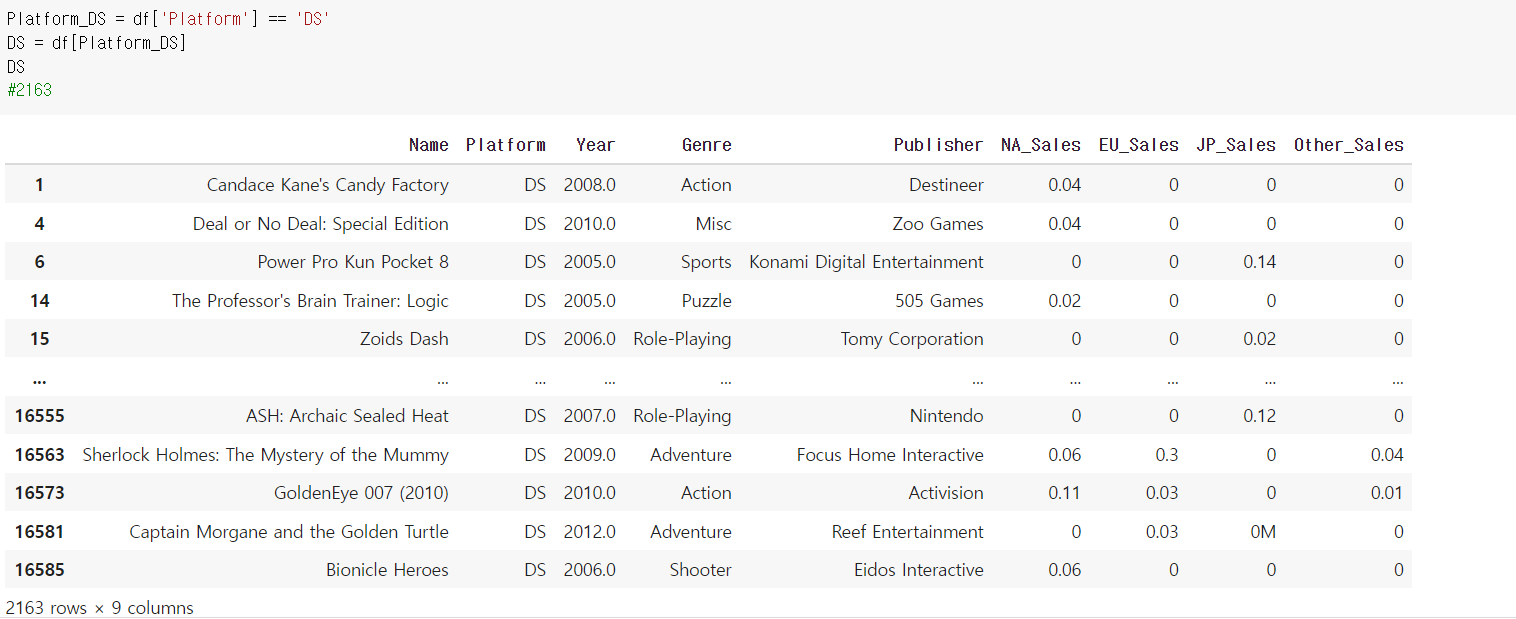

In [34]:
# Platform_DS = df['Platform'] == 'DS'  DS = df[Platform_DS]로 단어갯수를 찾아줌

## Name  = df["Name"]
## Platform = df["Platform"]
## Year = df["Year"]
## Genre= ["Genre"]
## Publisher = ["Publisher"]
## NA_Sales = ["NA_Sales"]
## EU_Sales = ["EU_Sales"]
## JP_Sales = ["JP_Sales"]
## Other_Sales = ["Other_Sales"]

# Platform DS, 3DS, Wii, WiiU, PS, PSP, PS2, PS3, PS4, PSV, PC, XB, X360, GBA, GB, GC, 2600, SAT, NES, SNES, N64, XOne, GEN, NG, DC, TG16, SCD, WS, 3DO
# 전체16598 rows 

# Platform_   = df['Platform'] == '  '
#    = df[Platform_  ]


# DS: 2163
# 3DS: 509
# Wii: 1325
# WiiU: 143
# PS: 1196 
# PSP: 1213(1214)
# PS2: 2161
# PS3: 1329(1330)
# PS4: 336
# PSV: 413
# PC: 960
# XB: 824 
# X360: 1265 
# GBA: 822 
# GB:98 
# GC: 556
# 2600: 133
# SAT: 173 
# NES:98
# SNES: 239 
# N64: 319 
# XOne: 213 
# GEN: 27 
# NG: 12 
# DC: 52 
# TG16: 2  
# SCD: 6
# WS: 6 
# 3DO: 3 

In [ ]:
#선호 장르 (전체)
#위와 같은방식으로 진행
# Platform_   = df['Platform'] == '  '
#    = df[Platform_  ]
# Action, Adventure, Fighting, Misc, Platform, Puzzle, Racing, Role-Playing, Shooter, Simulation, Sports, Strategy
# Action:3335
# Adventure:1541
# Fighting:868
# Misc:1738
# Platform:885
# Puzzle:634
# Racing:1395
# Role-Playing:1483
# Shooter:1311
# Simulation:868
# Sports:2447
# Strategy:681

In [ ]:
#NA
# Platform_   = df['Platform'] == '  '
#    = df[Platform_  ]

In [ ]:
#EU
# Platform_   = df['Platform'] == '  '
#    = df[Platform_  ]

In [ ]:
#JP

In [ ]:
#OT

In [10]:
1900년대 

# DS:17
# 3DS:4
# Wii:5
# WiiU:0
# PS:870
# PSP:7
# PS2:12
# PS3:8
# PS4:3
# PSV:5
# PC:44
# XB:5
# X360:5
# GBA:4
# GB:67
# GC:3
# 2600:116
# SAT:173
# NES:98
# SNES:239
# N64:216
# XOne:0
# GEN:27
# NG:12
# DC:19
# TG16: 2
# SCD:6
# WS:2
# 3DO:3


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04




# **Platform 순위**

**1.DS: 2163**

**2.PS2: 2161**

**3.PS3: 1329 (1330)**



#**장르 순위**


**1.Action:3335**

**2.Sports:2447**

**3.Misc:1738**

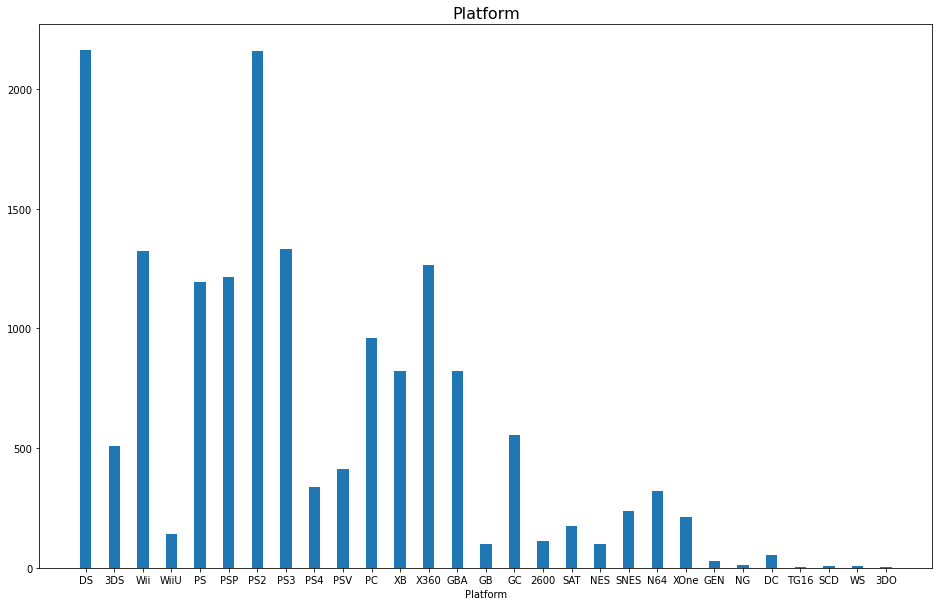

In [172]:
#Platform
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(29)
years = ["DS", "3DS", "Wii", "WiiU", "PS", "PSP", "PS2", "PS3", "PS4", "PSV", "PC", "XB", "X360", "GBA", "GB", "GC", "2600", "SAT","NES", "SNES", "N64", "XOne", "GEN", "NG", "DC", "TG16", "SCD", "WS", "3DO"]
values = [2163, 509, 1325, 143, 1196, 1214, 2161, 1330, 336, 413, 960, 824, 1265, 822, 98, 556, 113, 173, 98, 239, 319, 213, 27, 12, 52, 2, 6, 6, 3]


plt.bar(x, values, width=0.4)

plt.xticks(x, years)
plt.title("Platform", fontsize=16)
plt.xlabel("Platform", fontsize=10)
plt.show()

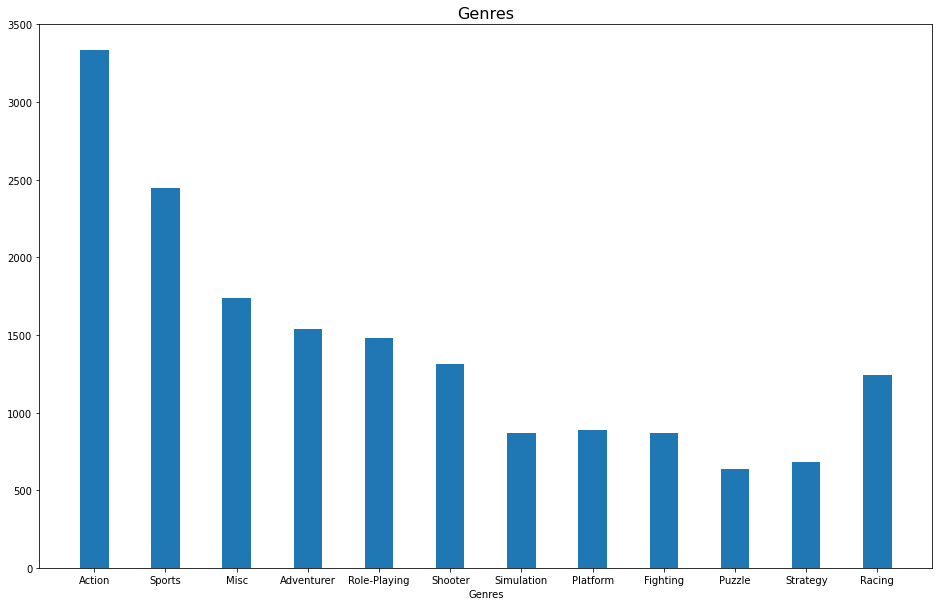

In [57]:
#전체장르

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(12)
Genre = ["Action", "Sports", "Misc", "Adventurer","Role-Playing", "Shooter" ,"Simulation","Platform","Fighting", "Puzzle","Strategy","Racing"]
values = [3335, 2447, 1738, 1541, 1483, 1311, 868, 885, 868, 634, 681, 1243]

plt.bar(x, values, width=0.4)

plt.xticks(x, Genre)
plt.title("Genres", fontsize=16)
plt.xlabel("Genres", fontsize=10)
plt.show()


**년도별 트렌드**

**19XX년대**

PS:870

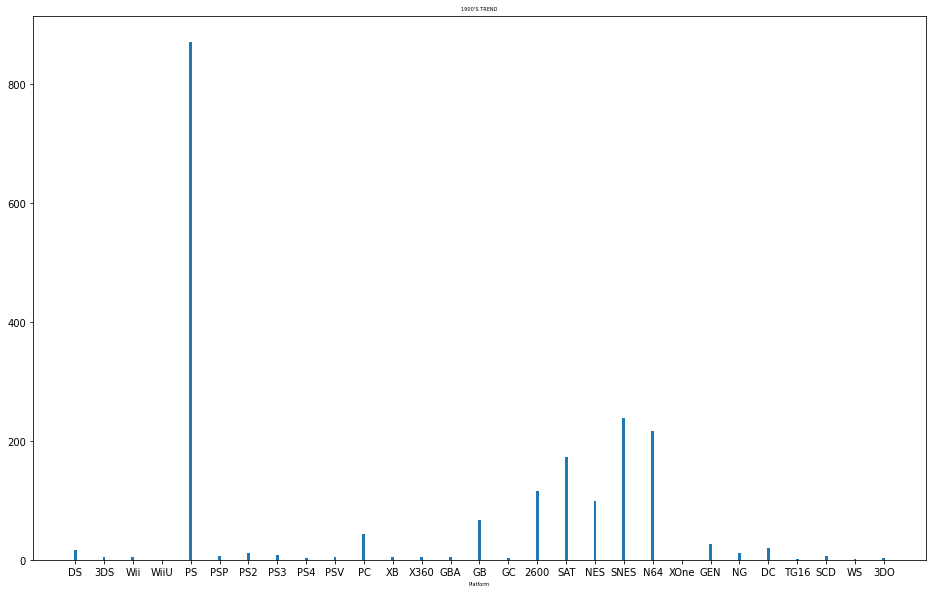

In [21]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(29)
years = ["DS", "3DS", "Wii", "WiiU", "PS", "PSP", "PS2", "PS3", "PS4", "PSV", "PC", "XB", "X360", "GBA", "GB", "GC", "2600", "SAT","NES", "SNES", "N64", "XOne", "GEN", "NG", "DC", "TG16", "SCD", "WS", "3DO"]
values = [17, 4, 5, 0, 870, 7, 12, 8, 3, 5, 44, 5, 5, 4, 67, 3, 116, 173, 98, 239, 216, 0, 27, 12, 19, 2, 6, 2, 3]


plt.bar(x, values, width=0.4)
plt.xticks(x, years)
plt.title("1900'S TREND", fontsize=5)
plt.xlabel("Platform", fontsize=5)
plt.show()


**2000대 초반**

PS2:2108

DS:1927

**2000대 후반**

PS3:703

X360:505

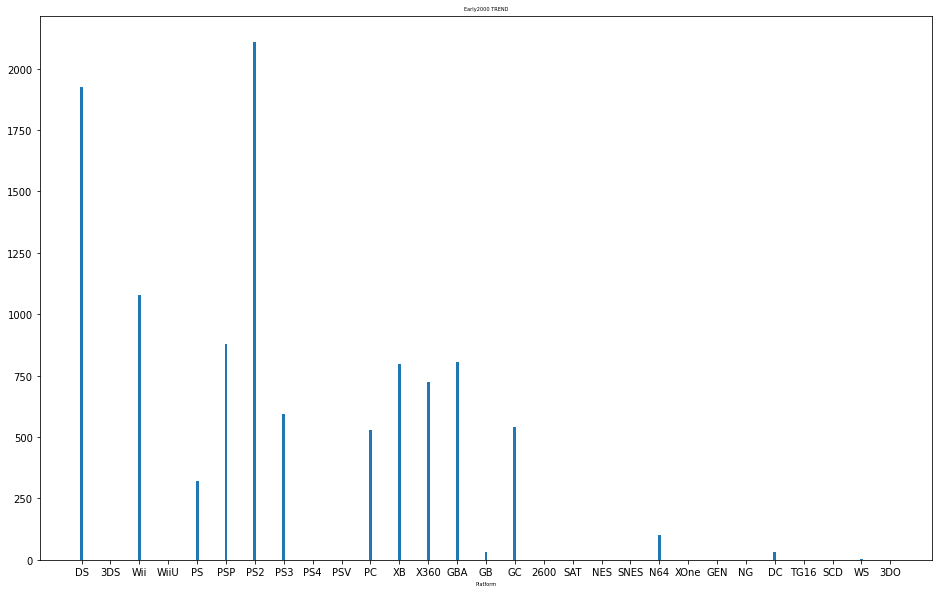

In [33]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(29)
years = ["DS", "3DS", "Wii", "WiiU", "PS", "PSP", "PS2", "PS3", "PS4", "PSV", "PC", "XB", "X360", "GBA", "GB", "GC", "2600", "SAT","NES", "SNES", "N64", "XOne", "GEN", "NG", "DC", "TG16", "SCD", "WS", "3DO"]
values = [1927, 0, 1078, 0, 319, 878, 2108, 593, 0, 0, 527, 798, 725, 807, 30, 539, 0, 0, 0, 0, 100, 0, 0, 0, 33, 0, 0, 4, 0]


plt.bar(x, values, width=0.1)
plt.xticks(x, years)
plt.title("Early2000 TREND", fontsize=5)
plt.xlabel("Platform", fontsize=5)
plt.show()



In [39]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(29)
years = ["DS", "3DS", "Wii", "WiiU", "PS", "PSP", "PS2", "PS3", "PS4", "PSV", "PC", "XB", "X360", "GBA", "GB", "GC", "2600", "SAT","NES", "SNES", "N64", "XOne", "GEN", "NG", "DC", "TG16", "SCD", "WS", "3DO"]
values = [189, 496, 207, 143, 0, 311, 7, 703, 333, 407, 372, 0, 505, 0, 0, 0, 0, 0, 0, 0, 0, 123, 0, 0, 0, 0, 0, 0]


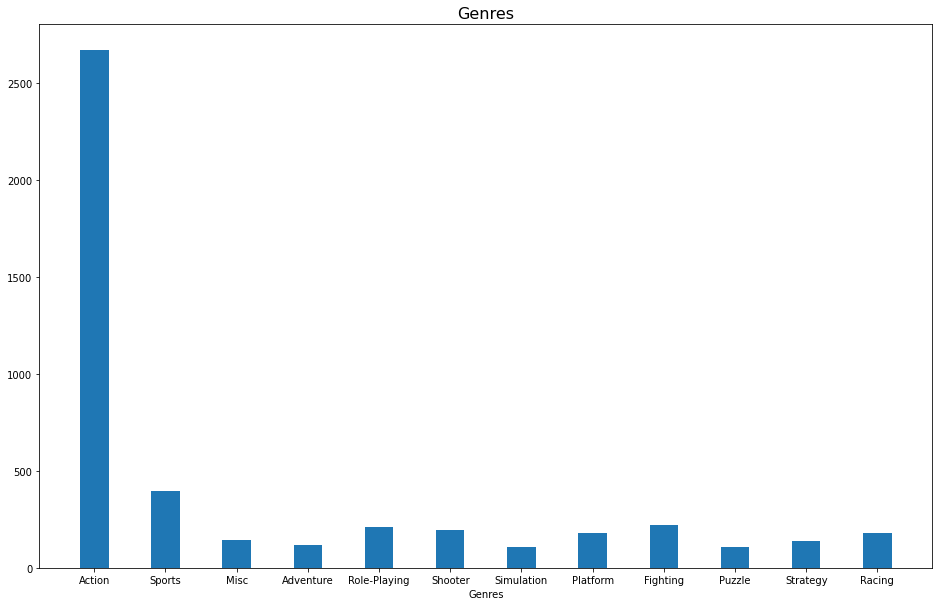

In [48]:
#전체장르 1900


import matplotlib.pyplot as plt
import numpy as np

x = np.arange(12)
Genre = ["Action", "Sports", "Misc", "Adventure","Role-Playing", "Shooter" ,"Simulation","Platform","Fighting", "Puzzle","Strategy" ,"Racing"]
values = [2671, 394, 145, 117, 213 , 194, 109, 179, 223, 109, 139, 181]

plt.bar(x, values, width=0.4)

plt.xticks(x, Genre)
plt.title("Genres", fontsize=16)
plt.xlabel("Genres", fontsize=10)
plt.show()


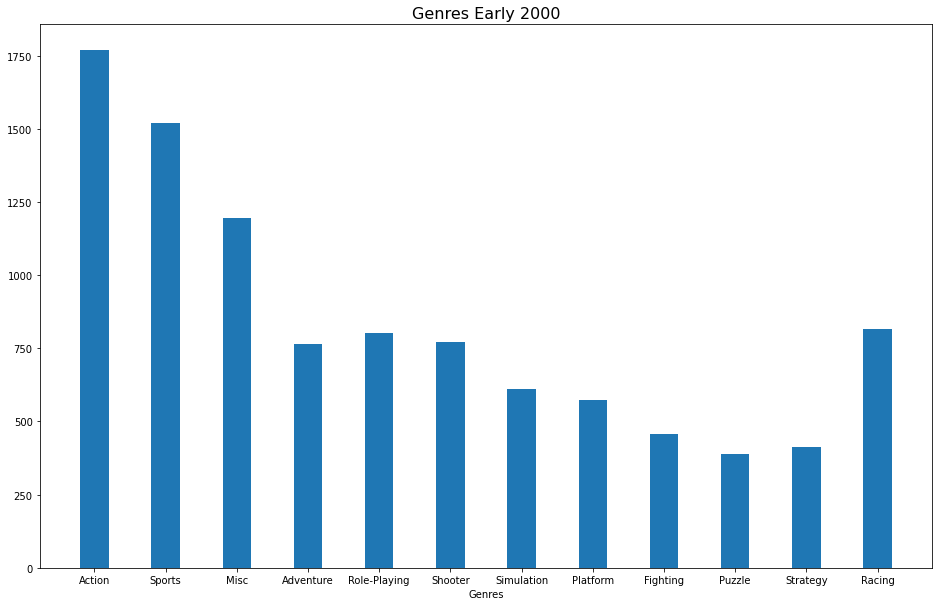

In [49]:
#전체장르 2000 초반
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(12)
Genre = ["Action", "Sports", "Misc", "Adventure","Role-Playing", "Shooter" ,"Simulation","Platform","Fighting", "Puzzle","Strategy", "Racing"]
values = [1769, 1519, 1195, 766, 801, 771, 612, 573, 458, 389, 414, 817]

plt.bar(x, values, width=0.4)

plt.xticks(x, Genre)
plt.title("Genres Early 2000", fontsize=16)
plt.xlabel("Genres", fontsize=10)
plt.show()


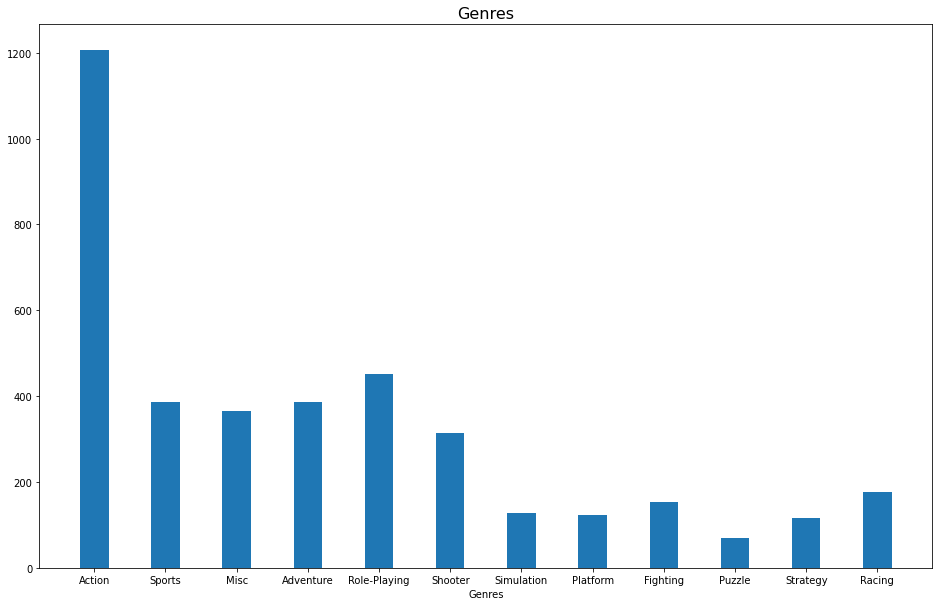

In [50]:
#전체장르 2000후반
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(12)
Genre = ["Action", "Sports", "Misc", "Adventure","Role-Playing", "Shooter" ,"Simulation","Platform","Fighting", "Puzzle","Strategy", "Racing"]
values = [1206,386, 365, 386, 452, 315, 128, 122, 154, 69 , 117, 176 ]

plt.bar(x, values, width=0.4)

plt.xticks(x, Genre)
plt.title("Genres", fontsize=16)
plt.xlabel("Genres", fontsize=10)
plt.show()


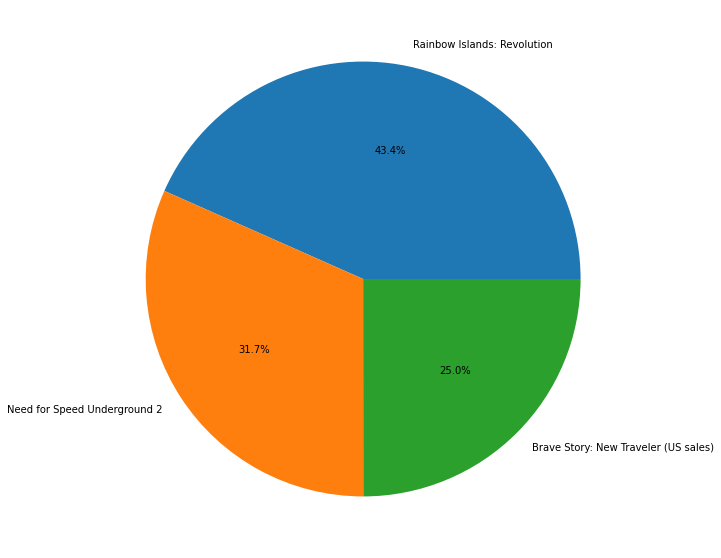

In [51]:
import matplotlib.pyplot as plt
#북미 top3
ratio = [9630000, 7030000, 5550000]
labels = ['Rainbow Islands: Revolution', 'Need for Speed Underground 2', 'Brave Story: New Traveler (US sales)']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

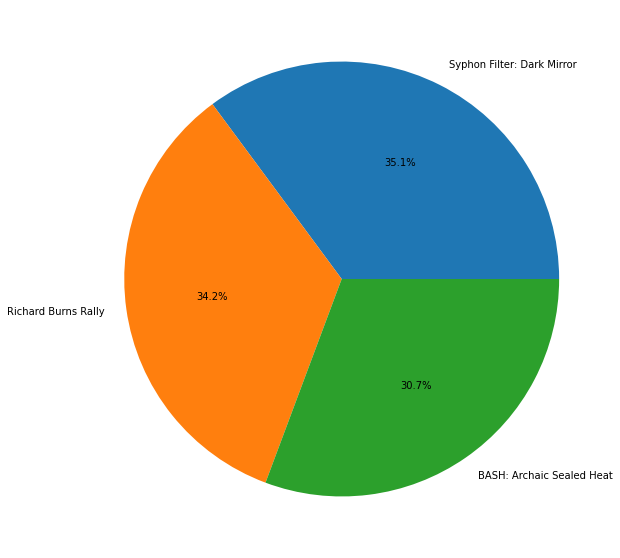

In [53]:
import matplotlib.pyplot as plt
#유럽top3
ratio = [2930000,2850000 , 2560000]
labels = ['Syphon Filter: Dark Mirror', 'Richard Burns Rally', 'BASH: Archaic Sealed Heat']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

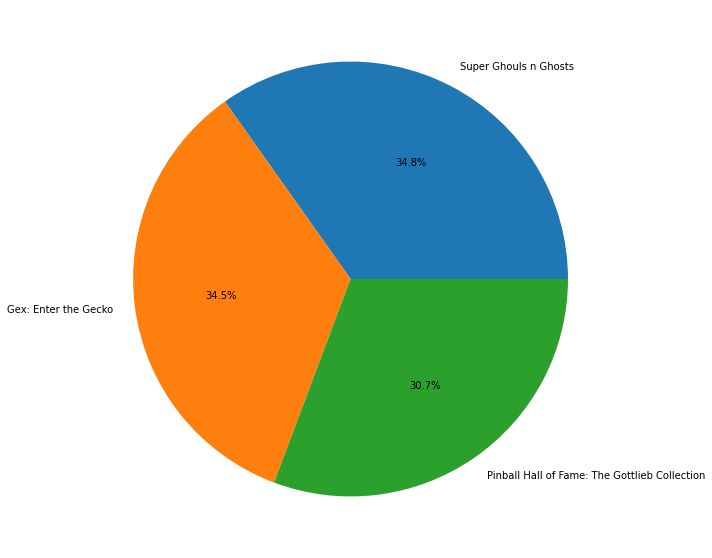

In [54]:
import matplotlib.pyplot as plt
#일본top3
ratio = [3150000,3120000 , 2780000]
labels = ['Super Ghouls n Ghosts', 'Gex: Enter the Gecko', 'Pinball Hall of Fame: The Gottlieb Collection']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

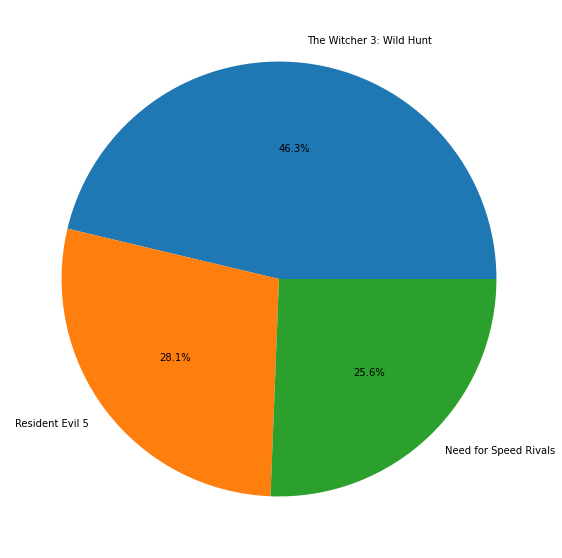

In [55]:
import matplotlib.pyplot as plt
#기타top3
ratio = [560000,340000 , 310000]
labels = ['The Witcher 3: Wild Hunt', 'Resident Evil 5', 'Need for Speed Rivals']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

#년도별 트렌드
 플랫폼의 경우 PS가 꾸준히 업그레이드 된 버젼으로 유행하였으며, 장르도 년도별로 제일인기있는 분야는 액션으로 같다. 그러나 세부적인 부분에서는 조금씩 차이가 난다.
#지역별트렌드
모든 나라에서 액션게임이 제일 잘나가고 있다.

분석결과 만들어야 될 게임은 액션게임으로써 PS쪽 계열 플랫폼에서출시하여야 한다.